$$
\def\CC{\bf C}
\def\QQ{\bf Q}
\def\RR{\bf R}
\def\ZZ{\bf Z}
\def\NN{\bf N}
$$
# Numerical integration of the HH model of the squid axon

**Book chapters**

See [Chapter 2 Section
2](http://neuronaldynamics.epfl.ch/online/Ch2.S2.html) on general
information about the Hodgkin-Huxley equations and models.

**Python classes**

The `.hodgkin_huxley.HH` module contains all code required for this
exercise. It implements a Hodgkin-Huxley neuron model. At the beginning
of your exercise solutions, import the modules and run the demo
function.

In [4]:
!pip install brian2
!pip install neurodynex

     |████████████████████████████████| 1.6MB 2.7MB/s 
     |████████████████████████████████| 5.8MB 14.1MB/s 
  Created wheel for brian2: filename=Brian2-2.4.1-cp36-cp36m-linux_x86_64.whl size=1263554 sha256=a8ad4aef8d2e8ed978df1c1baccc625c7ec43fa2c43c80ea9f7302dde95dfe90
  Stored in directory: /root/.cache/pip/wheels/75/e9/fe/3f76437548ddc25452f0fc3b4350768bcbecc51b53cde1f1ad
Successfully built brian2
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1
     |████████████████████████████████| 71kB 2.0MB/s 


In [5]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.hodgkin_huxley import HH
from neurodynex.tools import input_factory

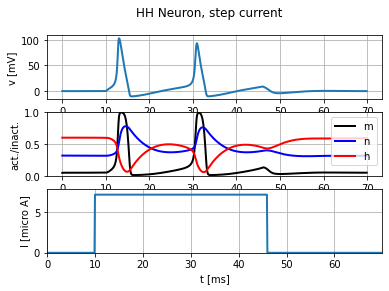

In [4]:
HH.getting_started()

<figure><img src="exc_images/HH_getting_started.png" alt="Step current injection into a Hodgkin-Huxley neuron" class="align-center" /><figcaption>Step current injection into a Hodgkin-Huxley neuron</figcaption></figure>

## Exercise 1.: step current response

We study the response of a Hodgkin-Huxley neuron to different input
currents. Have a look at the documentation of the functions
`.HH.simulate_HH_neuron` and `.HH.plot_data` and the module
`neurodynex.tools.input_factory`.

### Question 1.1

What is the lowest step current amplitude I\_min for generating **at
least one spike**? Determine the value by trying different input
amplitudes in the code fragment:

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
I_mins = [2.28, 2.3]

In [10]:
currents = [input_factory.get_step_current(5, 15, b2.ms, I_min *b2.uA) for I_min in I_mins]
state_monitors = [HH.simulate_HH_neuron(current, 120 * b2.ms) for current in currents]

**Answer 1.1: as illustrated on the figures below, the lowest step current amplitude that elicits at least one spike is around 2.3 micro A.**

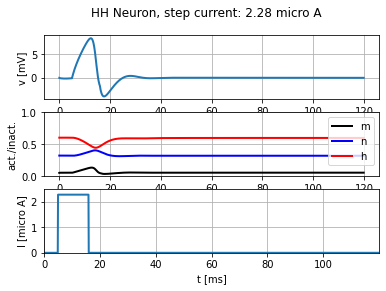

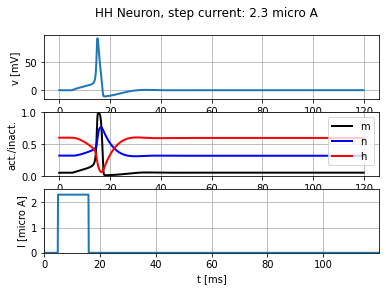

In [13]:
for idx, state_monitor in enumerate(state_monitors):

    HH.plot_data(state_monitor, title=f"HH Neuron, step current: {round(I_mins[idx], 2)} micro A")

### Question 1.2

-   What is the lowest step current amplitude to generate **repetitive
    firing**?
-   Discuss the difference between the two regimes.

In [121]:
I_reps = [37.4, 37.5]

In [122]:
rep_currents = [input_factory.get_step_current(5, 15, b2.ms, I_rep * b2.uA) for I_rep in I_reps]
rep_state_monitors = [HH.simulate_HH_neuron(rep_current, 120 * b2.ms) for rep_current in rep_currents]

**Answer 1.2.1: as shown below, the minimal step current amplitude enough to elicit repetitive spiking is between 37.4 and 37.5 micro A. (Note: with this input duration, we can only elicit two spikes. In order to generate more spikes, the input duration needs to be increased.)**

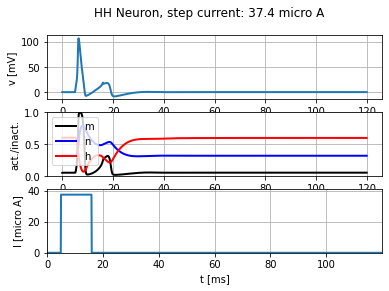

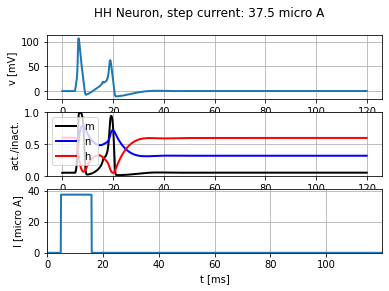

In [123]:
for idx, rep_state_monitor in enumerate(rep_state_monitors):

    HH.plot_data(rep_state_monitor, title=f"HH Neuron, step current: {round(I_reps[idx], 2)} micro A")

**Answer 1.2.2: Between the two regimes (from ~ 2.3 - 37.5 micro A), the membrain voltage increases slightly after the spike, but this is insuffient to elicit a second spike, due to the refractory period.**

In [126]:
I_betws = np.linspace(5, 30, 3)
betw_currents = [input_factory.get_step_current(5, 15, b2.ms, I_betw * b2.uA) for I_betw in I_betws]
betw_state_monitors = [HH.simulate_HH_neuron(betw_current, 120 * b2.ms) for betw_current in betw_currents]

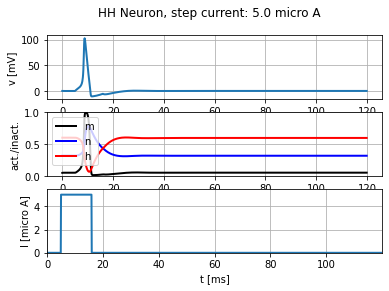

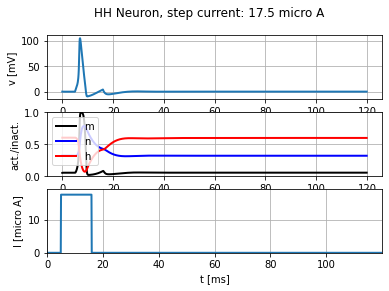

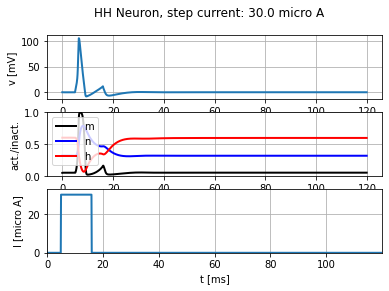

In [127]:
for idx, betw_state_monitor in enumerate(betw_state_monitors):

    HH.plot_data(betw_state_monitor, title=f"HH Neuron, step current: {round(I_betws[idx], 2)} micro A")

## Exercise 2.: slow and fast ramp current

The minimal current to elicit a spike does not just depend on the
amplitude I or on the total charge Q of the current, but on the "shape"
of the current. Let's see why:

### Question 2.1

Inject a slow ramp current into a HH neuron. The current has amplitude
`0 A` at t in [0, 5] ms and linearly increases to an amplitude of
`12.0 uAmp` at `t = ramp_t_end`. At `t > ramp_t_end`, the current is set to
`0 A`. Using the following code, reduce `slow_ramp_t_end` to the maximal
duration of the ramp current, such that the neuron does **not** spike.
Make sure you simulate system for at least 20 ms after the current stops.

-   What is the membrane voltage at the time when the current injection stops (`t = slow_ramp_t_end`)?

In [17]:
b2.defaultclock.dt = 0.02 * b2.ms
slow_ramp_t_ends = [49, 50]

In [18]:
slow_ramp_currents = [input_factory.get_ramp_current(5, slow_ramp_t_end, b2.ms, 0. * b2.uA, 12.0 * b2.uA) for slow_ramp_t_end in slow_ramp_t_ends]
slow_ramp_state_monitors = [HH.simulate_HH_neuron(slow_ramp_current, 90 * b2.ms) for slow_ramp_current in slow_ramp_currents]

**Answer 2.1: as illustrated, the minimal duration that does not elicit a spike is around 45 ms. The membrane voltage at the time the current injection stops in this case is 8.78 mV.**

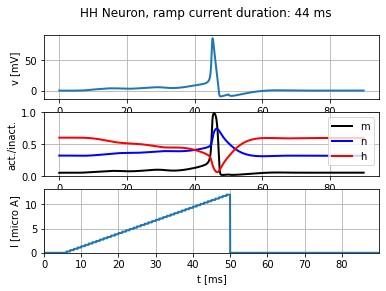

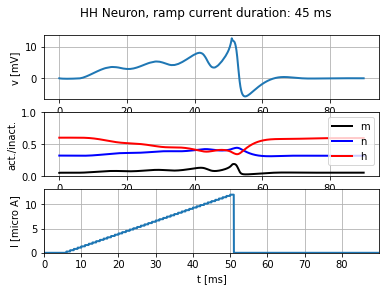

In [19]:
for idx, slow_ramp_state_monitor in enumerate(slow_ramp_state_monitors):

    HH.plot_data(slow_ramp_state_monitor, title=f"HH Neuron, ramp current duration: {slow_ramp_t_ends[idx] - 5} ms")

In [20]:
idx_t_end_slow = int(round(slow_ramp_t_ends[1] * b2.ms / b2.defaultclock.dt))
voltage_slow = slow_ramp_state_monitors[1].vm[0, idx_t_end_slow]
print(f"voltage_slow = {round(float(voltage_slow) * 1000, 2)} mV")

voltage_slow = 8.78 mV


### Question 2.2

Do the same as before but for a fast ramp current: The maximal amplitude
at `t = ramp_t_end` is `4.5 uAmp`. Start with `fast_ramp_t_end = 8 ms` and
then increase it until you observe a spike. Note: Technically the input
current is implemented using a TimedArray. For a short, steep ramp, the
one milliseconds discretization for the current is not high enough. You
can create a finer resolution by setting the parameter `unit_time` in
the function `.input_factory.get_ramp_current` (see next code block)

-   What is the membrane voltage at the time when the current injection stops (`t = fast_ramp_t_end`)?

In [27]:
b2.defaultclock.dt = 0.02 * b2.ms
fast_ramp_t_ends = [88, 89]

In [28]:
fast_ramp_currents = [input_factory.get_ramp_current(50, int(fast_ramp_t_end), 0.1 * b2.ms, 0. * b2.uA, 4.5 * b2.uA) for fast_ramp_t_end in fast_ramp_t_ends]
fast_ramp_state_monitors = [HH.simulate_HH_neuron(fast_ramp_current, 40 * b2.ms) for fast_ramp_current in fast_ramp_currents]

**Answer 2.2: as illustrated, the minimal duration required to elicit a spike is around 3.9 ms. The membrane voltage at the time the current injection stops in this case is 6.37 mV.**

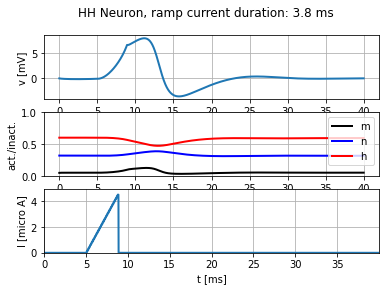

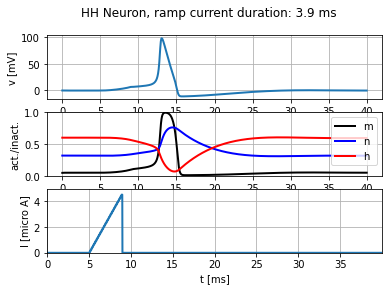

In [29]:
for idx, fast_ramp_state_monitor in enumerate(fast_ramp_state_monitors):

    HH.plot_data(fast_ramp_state_monitor, title=f"HH Neuron, ramp current duration: {round(fast_ramp_t_ends[idx] / 10 - 5, 1)} ms")

In [30]:
idx_t_end_fast = int(round(fast_ramp_t_ends[1] * 0.1 * b2.ms / b2.defaultclock.dt))
voltage_fast = fast_ramp_state_monitors[1].vm[0, idx_t_end_fast]
print(f"voltage_fast = {round(float(voltage_fast) * 1000, 2)} mV")

voltage_fast = 6.37 mV


### Question 2.3

Use the function `.HH.plot_data` to visualize the dynamics of the system
for the fast and the slow case above. Discuss the differences between
the two situations. Why are the two "threshold" voltages different? Link
your observation to the gating variables m, n and h. Hint: have a look
at [Chapter 2. Figure 2.3](http://neuronaldynamics.epfl.ch/online/Ch2.S2.html).

**Answer 2.3: In figure 2.3, we can see a voltage regime in which $h$ is decreasing faster than $m$ increases. This is also apparent in the figure below, in case of the slow ramp. As the sodium conductance depends on both $m$ and $h$, depolarization is slow and the spike is delayed. In case of the fast ramp, the voltage quickly reaches the regime in which $m$ increases faster than $h$ decreases, so the spike occurs earlier.**

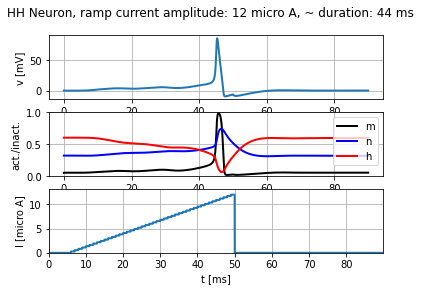

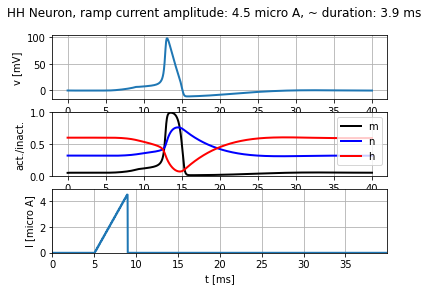

In [36]:
HH.plot_data(slow_ramp_state_monitors[0], title=f"HH Neuron, ramp current amplitude: 12 micro A, ~ duration: {slow_ramp_t_ends[0] - 5} ms")
HH.plot_data(fast_ramp_state_monitors[1], title=f"HH Neuron, ramp current amplitude: 4.5 micro A, ~ duration: {round(fast_ramp_t_ends[1] / 10 - 5, 1)} ms")

## Exercise 3.: Rebound Spike

A HH neuron can spike not only if it receives a sufficiently strong
depolarizing input current but also after a hyperpolarizing current.
Such a spike is called a *rebound spike*.

### Question 3.

Inject a hyperpolarizing step current `I_amp = -1 uA` for 20ms into the
HH neuron. Simulate the neuron for 50 ms and plot the voltage trace and
the gating variables. Repeat the simulation with `I_amp = -5 uA`. What is
happening here? To which gating variable do you attribute this rebound
spike?

In [141]:
I_rebounds = [-1, -5]
rebound_currents = [input_factory.get_step_current(5, 25, b2.ms, I_rebound * b2.uA) for I_rebound in I_rebounds]
rebound_state_monitors = [HH.simulate_HH_neuron(rebound_current, 50 * b2.ms) for rebound_current in rebound_currents]

**Answer 3: As illustrated below, the -1 micro A hyperpolarizing current is insufficient to elicit a spike, but the -5 micro A current does result in spiking.**

**This is because the conductance of the sodium channels depends on both gating variables $m$ and $h$:** $\frac{1}{R_{Na}} = g_{Na}m^3h$. **Also, variable $m$ is the increasing, while variable $h$ is the decreasing function of voltage. Therefore, due to the strong negative membrane potential, $h$ is close to 1, and $m$ is close to, but not exactly 0. (This is apparent on the figure as well: the red curve, representing gating varible $h$, increases during the injection of the step current.) This allows for some sodium influx, which slowly depolarizes the membrane, resulting in an action potential at around 30 ms.**

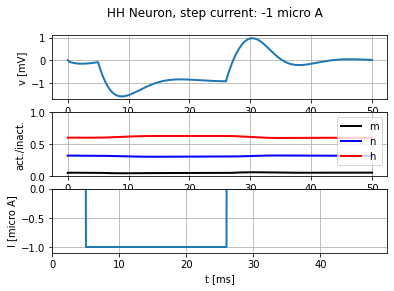

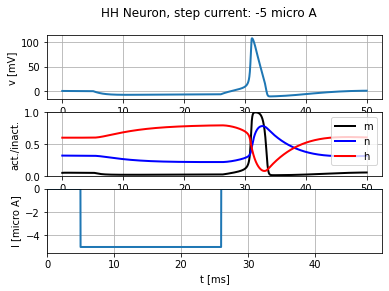

In [145]:
for idx, rebound_state_monitor in enumerate(rebound_state_monitors):

        HH.plot_data(rebound_state_monitor, title=f"HH Neuron, step current: {I_rebounds[idx]} micro A")

## Exercise 4.: Brian implementation of a HH neuron

In this exercise you will learn to work with the Brian2 model equations.
To do so, get the source code of the function `.HH.simulate_HH_neuron`
(follow the link to the documentation and then click on the \[source\]
link). Copy the function code and paste it into your Jupyter Notebook.
Change the function name from simulate\_HH\_neuron to a name of your
choice. Have a look at the source code and find the conductance
parameters gK and gNa.

In [23]:
def modified_HH(input_current, simulation_time, sodium_factor=1.4):

    """A Hodgkin-Huxley neuron implemented in Brian2.

    Args:
        input_current (TimedArray): Input current injected into the HH neuron
        simulation_time (float): Simulation time [seconds]

    Returns:
        StateMonitor: Brian2 StateMonitor with recorded fields
        ["vm", "I_e", "m", "n", "h"]
    """

    # neuron parameters
    El = 10.6 * b2.mV
    EK = -12 * b2.mV
    ENa = 115 * b2.mV
    gl = 0.3 * b2.msiemens
    gK = 36 * b2.msiemens
    gNa = 120 * b2.msiemens * sodium_factor
    C = 1 * b2.ufarad

    # forming HH model with differential equations
    eqs = """
    I_e = input_current(t,i) : amp
    membrane_Im = I_e + gNa*m**3*h*(ENa-vm) + \
        gl*(El-vm) + gK*n**4*(EK-vm) : amp
    alphah = .07*exp(-.05*vm/mV)/ms    : Hz
    alpham = .1*(25*mV-vm)/(exp(2.5-.1*vm/mV)-1)/mV/ms : Hz
    alphan = .01*(10*mV-vm)/(exp(1-.1*vm/mV)-1)/mV/ms : Hz
    betah = 1./(1+exp(3.-.1*vm/mV))/ms : Hz
    betam = 4*exp(-.0556*vm/mV)/ms : Hz
    betan = .125*exp(-.0125*vm/mV)/ms : Hz
    dh/dt = alphah*(1-h)-betah*h : 1
    dm/dt = alpham*(1-m)-betam*m : 1
    dn/dt = alphan*(1-n)-betan*n : 1
    dvm/dt = membrane_Im/C : volt
    """

    neuron = b2.NeuronGroup(1, eqs, method="exponential_euler")

    # parameter initialization
    neuron.vm = 0
    neuron.m = 0.05
    neuron.h = 0.60
    neuron.n = 0.32

    # tracking parameters
    st_mon = b2.StateMonitor(neuron, ["vm", "I_e", "m", "n", "h"], record=True)

    # running the simulation
    hh_net = b2.Network(neuron)
    hh_net.add(st_mon)
    hh_net.run(simulation_time)

    return st_mon

### Question 4.

In the source code of your function, change the density of sodium
channels. Increase it by a factor of 1.4. Stimulate this modified neuron
with a step current.

-   What is the minimal current leading to repetitive spiking? Explain.
-   Run a simulation with no input current to determine the resting potential of the neuron. Link your observation to the Goldman–Hodgkin–Katz voltage equation.
-   If you increase the sodium conductance further, you can observe repetitive firing even in the absence of input. Why?

In [84]:
I_mods = [31.7, 31.8]

In [85]:
mod_currents = [input_factory.get_step_current(5, 15, b2.ms, I_mod * b2.uA) for I_mod in I_mods]
mod_state_monitors = [modified_HH(mod_current, 100 * b2.ms) for mod_current in mod_currents]

**Answer 4.1: As you can see, a lower step current amplitude (~ 31.8 micro A) is sufficient to elicit repetitive spiking (the less dense sodium channels required an input of the same duration with an ~ 37.5 micro A amplitude). This is because we increased the $g_{Na}$ parameter, which together with gating variables $m$ and $h$ determines the effective conductance of the sodium channels. After the first spike, in the hyperpolarized state, $g_{Na}$ and $h$ are large enough to let some sodium ions in, which along with the input raises the membrain potential. This in return increases $m$, resulting in further depolarization and finally another spike.**


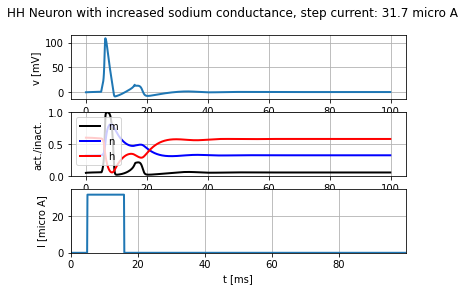

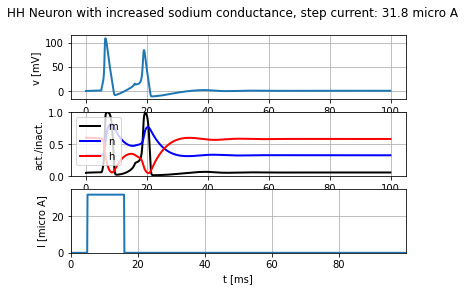

In [101]:
for idx, mod_state_monitor in enumerate(mod_state_monitors):

    HH.plot_data(mod_state_monitor, title=f"HH Neuron with increased sodium conductance, step current: {round(I_mods[idx], 2)} micro A")

In [45]:
no_input = input_factory.get_step_current(5, 15, b2.ms, 0 * b2.uA)
no_input_st_mon = modified_HH(no_input, 100 * b2.ms)

WARNING    /usr/local/lib/python3.6/dist-packages/neurodynex/hodgkin_huxley/HH.py:65: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  max(state_monitor.I_e[0] / b2.uamp) * 1.1
 [py.warnings]


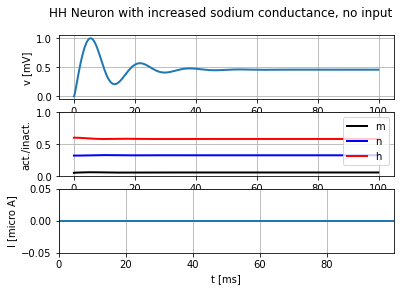

In [102]:
HH.plot_data(no_input_st_mon, title=f"HH Neuron with increased sodium conductance, no input")

In [47]:
resting_potential = no_input_st_mon.vm[0, 100]
print(f"resting potential = {round(float(resting_potential) * 1000, 2)} mV")

resting potential = 0.46 mV


**Answer 4.2: the resting potential is 0.46 mV.**

**According to the Goldman–Hodgkin–Katz equation, the resting potential is $\frac{RT}{F} ln \frac{P_{Na} [Na^+]_{EC} + P_{K} [K^+]_{EC} + P_{Cl} [Cl^-]_{IC}}{P_{Na} [Na^+]_{IC} + P_{K} [K^+]_{IC} + P_{Cl} [Cl^-]_{EC}}$. The currents for the ions are calculated as:**
- $g_{Na} m(t)^3 h(t) (E_{Na} - V(t))$
- $g_{K} n(t)^4 (E_{K} - V(t))$
- $g_{l} (E_{l} - V(t))$

In [145]:
  El = 10.6
  EK = -12
  ENa = 115
  gl = 0.3
  gK = 36
  gNa = 168
  mt = no_input_st_mon.m[0]
  nt = no_input_st_mon.n[0]
  ht = no_input_st_mon.h[0]
  vt = np.array(no_input_st_mon.vm)[0]

In [146]:
I_Na = np.array([gNa * mt[t] ** 3 * ht[t] * (ENa - vt[t]) for t in range(vt.shape[0])])
I_K = np.array([gK * nt[t] ** 4 * (EK - vt[t]) for t in range(vt.shape[0])])
I_l = gl * (El - vt)

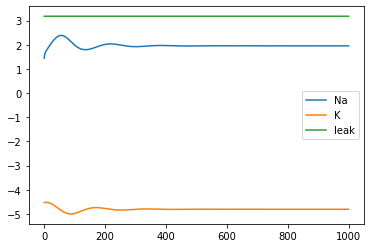

In [155]:
plt.plot(I_Na, label="Na")
plt.plot(I_K, label="K")
plt.plot(I_l, label="leak")
plt.legend()

**Answer 4.3: in the absence of input, the membrane potential remains negative for a longer period, which increases gating variable $h$. Along with the higher $g_{Na}$ conductance parameter, this results in a sodium influx, which is sufficient to raise the membrane potential above the threshold. This process repeats, resulting in a regular oscillation.**

In [99]:
no_input_st_mon_2 = modified_HH(no_input, 100 * b2.ms, sodium_factor=2)

WARNING    /usr/local/lib/python3.6/dist-packages/neurodynex/hodgkin_huxley/HH.py:65: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  max(state_monitor.I_e[0] / b2.uamp) * 1.1
 [py.warnings]


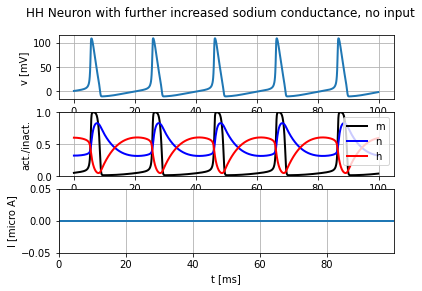

In [103]:
HH.plot_data(no_input_st_mon_2, title=f"HH Neuron with further increased sodium conductance, no input")